# Linear Support Vector Machine in Python

In this notebook you will find the steps to solve a SVM classification problem in python.

### Loading packages

In [1]:
%matplotlib inline

import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import StratifiedKFold
from scipy import interp
import matplotlib.pyplot as plt
import seaborn

Some interesting general functions:

In [2]:
def column(matrix, i):
    return [row[i] for row in matrix]

### Generating a toy model dataset

We are going to generate here a dataset to run a toy model:

In [3]:
n = 150 # Number of datapoints
p = 2   # Dimension

sigma   = 1  # Variance of the distribution
meanpos = 1  # centre of the distribution of positive examples
meanneg = -1  # centre of the distribution of negative examples

npos = round(n/2)  # Number of positive examples
nneg = n - npos

These features are going to be used to generate our example or training cases (x). As SVM requires labelled data, we also need a matrix y with the labels for our cases:

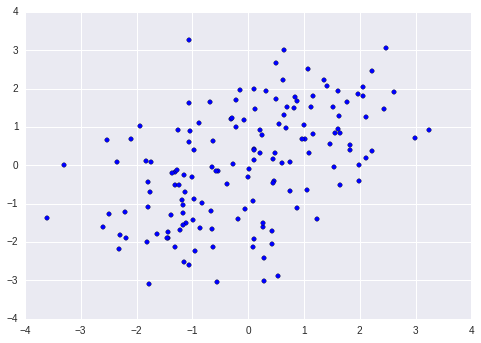

In [4]:
xpos = np.random.normal(meanpos, sigma, n)
xneg = np.random.normal(meanneg, sigma, n)

shape = (n/2, 2)

xpos = xpos.reshape(shape)
xneg = xneg.reshape(shape)

# Bind and plot the dataset
x = np.vstack((xpos, xneg))

plt.scatter(column(x, 0), column(x, 1))
plt.show()


We have there the two arrays with values, we need now the array with the labels:

In [5]:
y = np.array([1, -1])
y = np.repeat(y, [npos, nneg], axis=0)

y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Creating a model & Predicting

Once the x and y matrices have been created we can create a model to predict new labels for new datapoints.

Just by looking at our data set, we can see we have coordinate pairs that are "low" numbers and coordinate pairs that are "higher" numbers. We've then assigned -1 to the lower coordinate pairs and 1 to the higher feature pairs.

Moving along, we are now going to define our classifier:

In [6]:
clf = svm.SVC(kernel='linear', C = 1.0, probability=True)

We're going to be using the SVC (support vector classifier) SVM (support vector machine). Our kernel is going to be linear, and C is equal to 1.0. What is C you ask? Don't worry about it for now, but, if you must know, C is a valuation of "how badly" you want to properly classify, or fit, everything. The machine learning field is relatively new, and experimental. There exist many debates about the value of C, as well as how to calculate the value for C. We're going to just stick with 1.0 for now, which is a nice default parameter.

First we have to fit the model:

In [7]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

From here, the learning is done. It should be nearly-instant, since we have such a small data set.

Next, we can predict and test. Let's print a prediction:

In [8]:
to_predict = np.array([[-1.18, -1.76],[1.98, 1.16], [0,0],[4,4], [-5,-6]])
clf.predict(to_predict)

array([-1,  1,  1,  1, -1])

We see the predictor is working as expected. We can use it to plot the dataset:

[ 1.82555817  1.20106202]


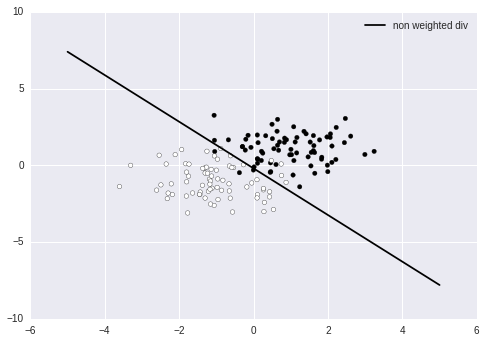

In [9]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(-5,5)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.legend()
plt.show()

### Obtain a score for a classified point

If we are interested in obtaining a score for the classified points, we can use the SVC method decision_function. This gives per-class scores for each sample (or a single score per sample in the binary case). When the constructor option probability is set to True, class membership probability estimates (from the methods predict_proba and predict_log_proba) are enabled. In the binary case, the probabilities are calibrated using Platt scaling: logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data. In the multiclass case, this is extended as per Wu et al. (2004).

Needless to say, the cross-validation involved in Platt scaling is an expensive operation for large datasets. In addition, the probability estimates may be inconsistent with the scores, in the sense that the “argmax” of the scores may not be the argmax of the probabilities. (E.g., in binary classification, a sample may be labeled by predict as belonging to a class that has probability <½ according to predict_proba.) Platt’s method is also known to have theoretical issues. If confidence scores are required, but these do not have to be probabilities, then it is advisable to set probability=False and use decision_function instead of predict_proba.



References:

    Platt -- > https://www.researchgate.net/file.PostFileLoader.html?id=540479d7d11b8bb1588b459d&assetKey=AS%3A273601008209920%401442242971560
    Wu, Lin and Weng, “Probability estimates for multi-class classification by pairwise coupling”. JMLR 5:975-1005, 2004.



In [10]:
clf.decision_function(to_predict)

array([ -4.0305413 ,   5.24532363,   0.2374865 ,  12.34396728, -16.0966765 ])

### ROC CURVE

With the dataset generated we can create a ROC curve in order to check the quality of the classification. 

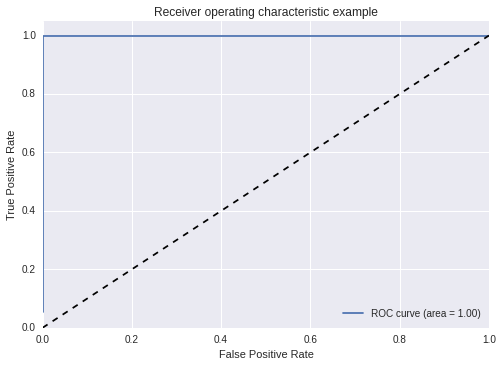

In [11]:
# Binarize the output
ybin = label_binarize(y, classes=[-1, 1])
n_classes = ybin.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, ybin, test_size=.2, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', C = 1.0, probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### ROC with CROSS Validation

The best approach to test the quality of the method is to run it with cross validation. To do this in python:

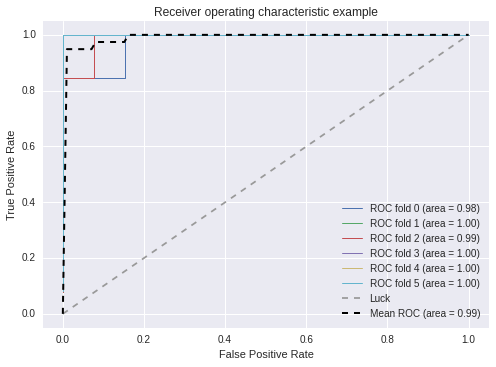

In [12]:
# Classification and ROC analysis
x, y = x[y != 2], y[y != 2]

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=6)
classifier = svm.SVC(kernel='linear', C = 1.0, probability=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


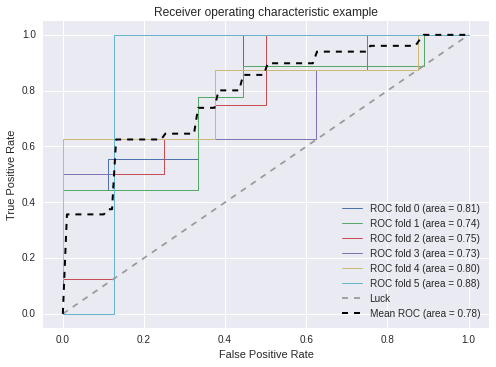

In [13]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [14]:
for i, (train, test) in enumerate(cv):
    print(test)
    print(train)

[ 0  1  2  3  4  5  6  7  8 50 51 52 53 54 55 56 57 58]
[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92
 93 94 95 96 97 98 99]
[ 9 10 11 12 13 14 15 16 17 59 60 61 62 63 64 65 66 67]
[ 0  1  2  3  4  5  6  7  8 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92
 93 94 95 96 97 98 99]
[18 19 20 21 22 23 24 25 68 69 70 71 72 73 74 75]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94 95 96 97 98 99]
[26 27 28 29 30 31 32 33 76 77 78 79 80 81 82 83]
[ 0  1  2  3  4  5  6  7  8  

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])